In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
!echo $CUDA_VISIBLE_DEVICES

0


In [2]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [3]:
from examples.dw4 import *
import yaml

/scratch/lim24/augmented-equivariant-flows/examples/train.py:10: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
2023-02-05 22:38:59.874709: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-05 22:38:59.874841: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-05 22:38:59.874855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

In [4]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [5]:
cfg = DictConfig(yaml.safe_load(open("examples/config/dw4.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'flow': {'dim': 2, 'nodes': 4, 'n_layers': 4, 'identity_init': True, 'type': 'proj_v2', 'fast_compile': True, 'compile_n_unroll': 1, 'egnn': {'emile_net': False, 'mlp_units': [32, 32], 'n_layers': 3, 'normalize_by_norms': True, 'variance_scaling_init': 0.001, 'tanh': False, 'agg': 'mean', 'phi_x_max': 1.0, 'h': {'linear_softmax': True, 'share_h': True}}, 'transformer': {'mlp_units': [32, 32], 'num_heads': 3, 'key_size': 4, 'w_init_scale': 0.1, 'n_layers': 3}}, 'training': {'lr': '1e-3', 'n_epoch': 50, 'batch_size': 100, 'plot_batch_size': 256, 'max_global_norm': None, 'seed': 0, 'reload_aug_per_epoch': True, 'train_set_size': 1000, 'test_set_size': 1000, 'n_plots': 6, 'n_checkpoints': 0, 'n_eval': 10, 'K_marginal_log_lik': 20, 'save': True, 'save_dir': 'dw4_results'}, 'logger': {'wandb': {'name': 'dw4_${flow.type}', 'project': 'fab', 'entity': 'flow-ais-bootstrap', 'tags': ['dw4']}}}

In [6]:
cfg.training.lr = 1e-4
cfg.flow.egnn.mlp_units = (32, 32)

cfg.flow.transformer.mlp_units = (16,)
cfg.flow.transformer.n_layers = 3
cfg.flow.transformer.num_heads = 3
cfg.flow.transformer.key_size =  4


cfg.flow.n_layers = 4
cfg.flow.egnn.n_layers = 3
cfg.training.batch_size = 100
cfg.training.n_epoch = 200
cfg.training.save = False
cfg.training.plot_batch_size = 128
cfg.logger = DictConfig({"list_logger": None})
cfg.flow.type= "proj_v2"

training data size of 1000


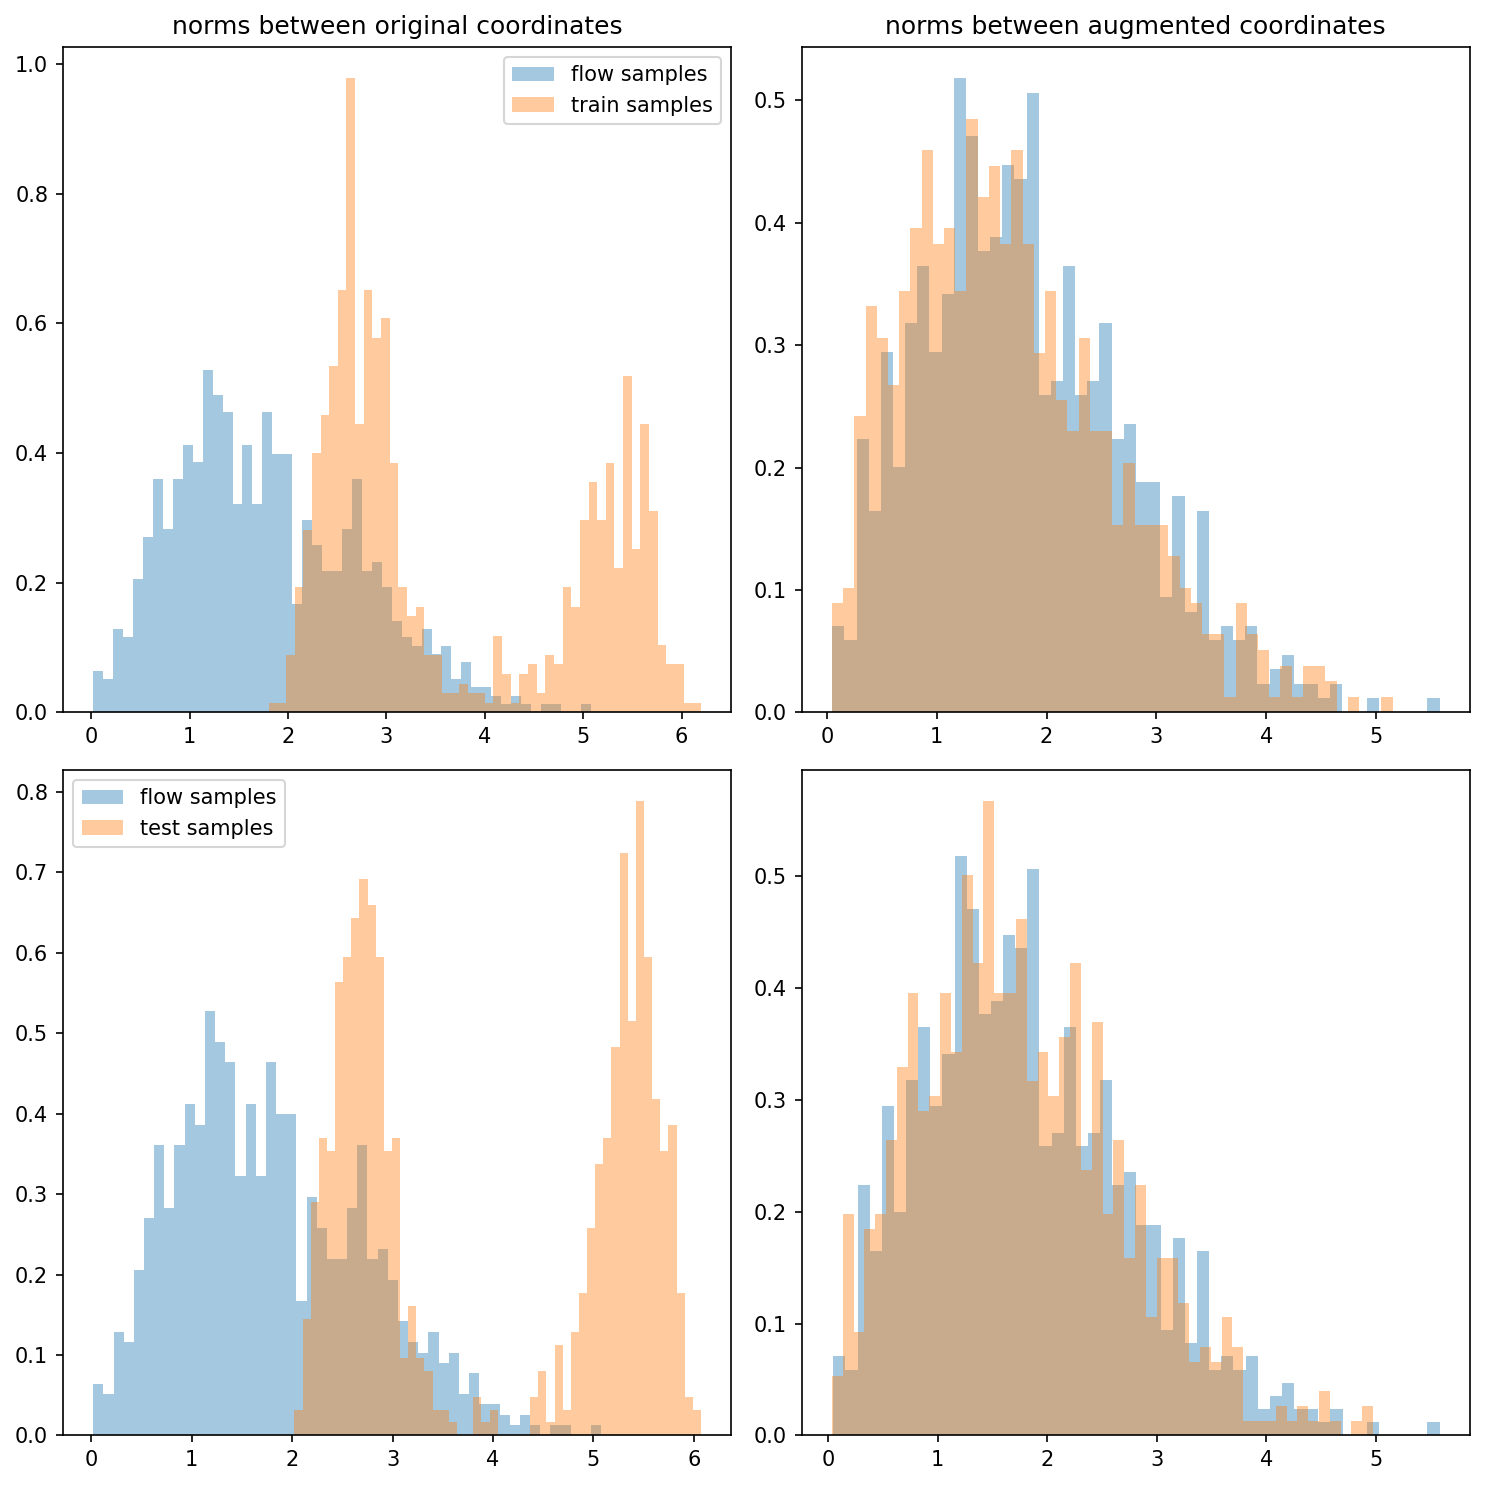

  0%|                                                                                                                                                                              | 0/200 [00:00<?, ?it/s]

non numeric history values being saved


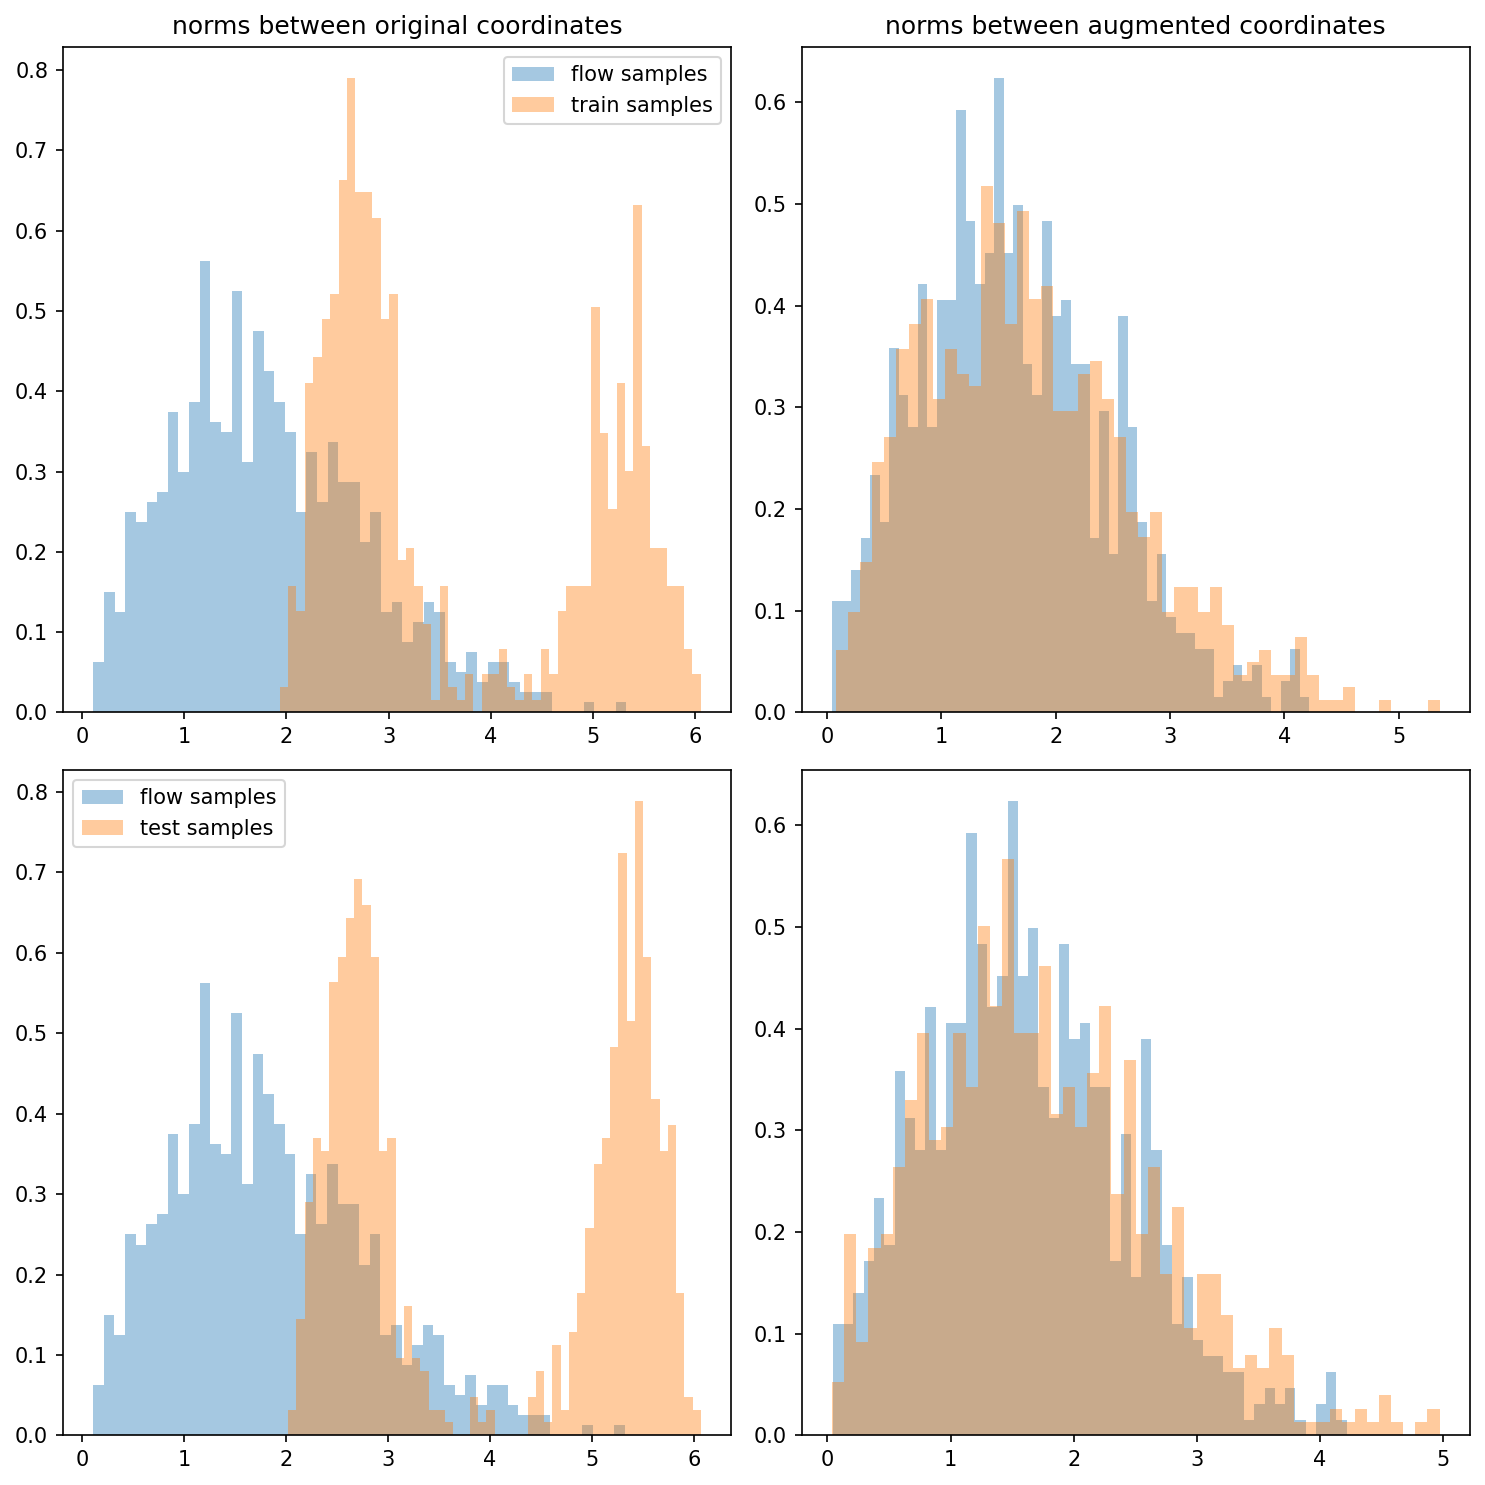

  0%|▊                                                                                                                                                                   | 1/200 [00:58<3:14:33, 58.66s/it]

{'eval_log_lik': Array(-26.485909, dtype=float32), 'eval_marginal_log_lik': Array(-16.153753, dtype=float32)}


 12%|██████████████████▉                                                                                                                                                  | 23/200 [01:11<01:52,  1.58it/s]

{'eval_log_lik': Array(-22.838802, dtype=float32), 'eval_marginal_log_lik': Array(-12.542836, dtype=float32)}


 20%|████████████████████████████████▏                                                                                                                                    | 39/200 [01:21<01:40,  1.60it/s]

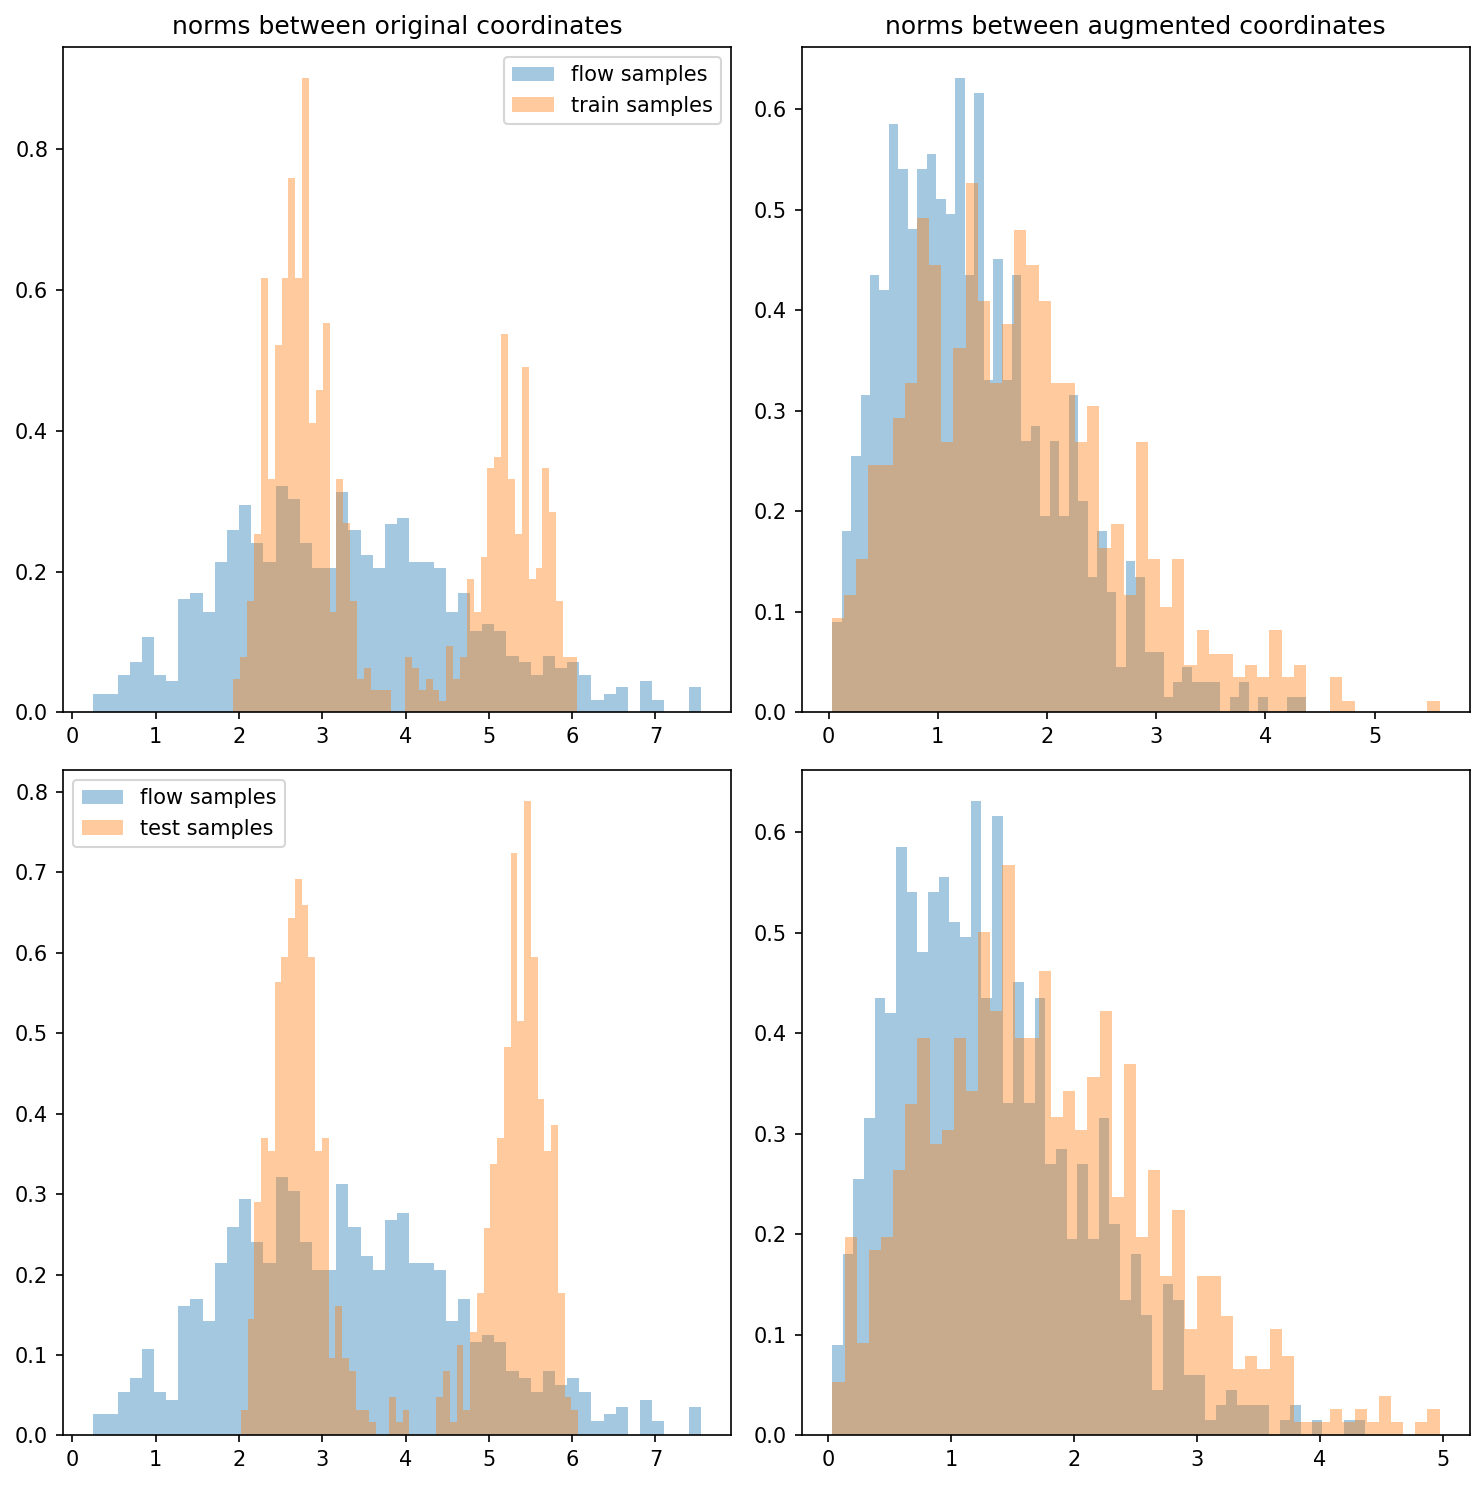

 22%|█████████████████████████████████████▏                                                                                                                               | 45/200 [01:27<01:54,  1.35it/s]

{'eval_log_lik': Array(-22.858974, dtype=float32), 'eval_marginal_log_lik': Array(-12.613878, dtype=float32)}


 34%|███████████████████████████████████████████████████████▎                                                                                                             | 67/200 [01:41<01:23,  1.60it/s]

{'eval_log_lik': Array(-22.796005, dtype=float32), 'eval_marginal_log_lik': Array(-12.486245, dtype=float32)}


 40%|█████████████████████████████████████████████████████████████████▏                                                                                                   | 79/200 [01:48<01:12,  1.67it/s]

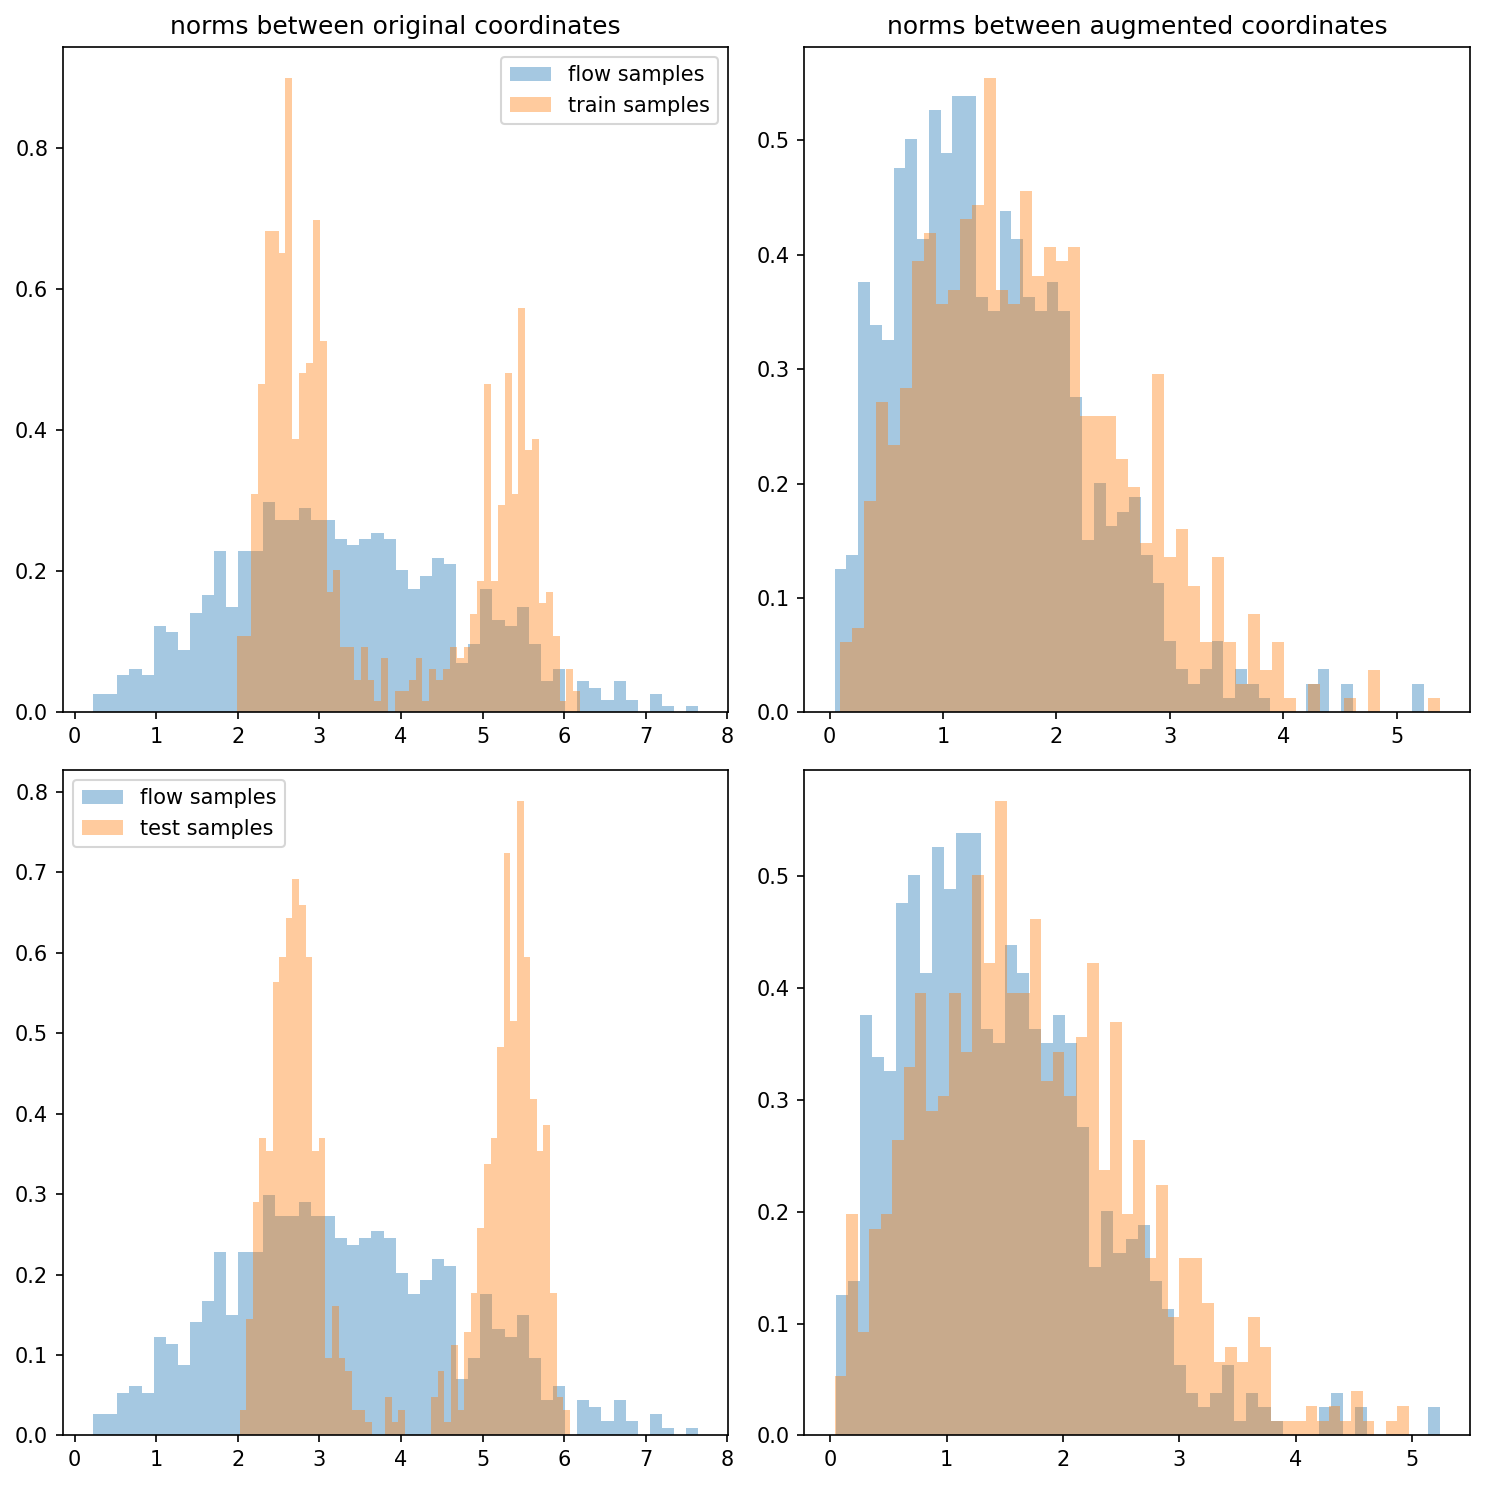

 44%|█████████████████████████████████████████████████████████████████████████▍                                                                                           | 89/200 [01:56<01:12,  1.53it/s]

{'eval_log_lik': Array(-22.475391, dtype=float32), 'eval_marginal_log_lik': Array(-12.244073, dtype=float32)}


 56%|███████████████████████████████████████████████████████████████████████████████████████████                                                                         | 111/200 [02:10<00:56,  1.59it/s]

{'eval_log_lik': Array(-22.480183, dtype=float32), 'eval_marginal_log_lik': Array(-12.196542, dtype=float32)}


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 119/200 [02:14<00:49,  1.65it/s]

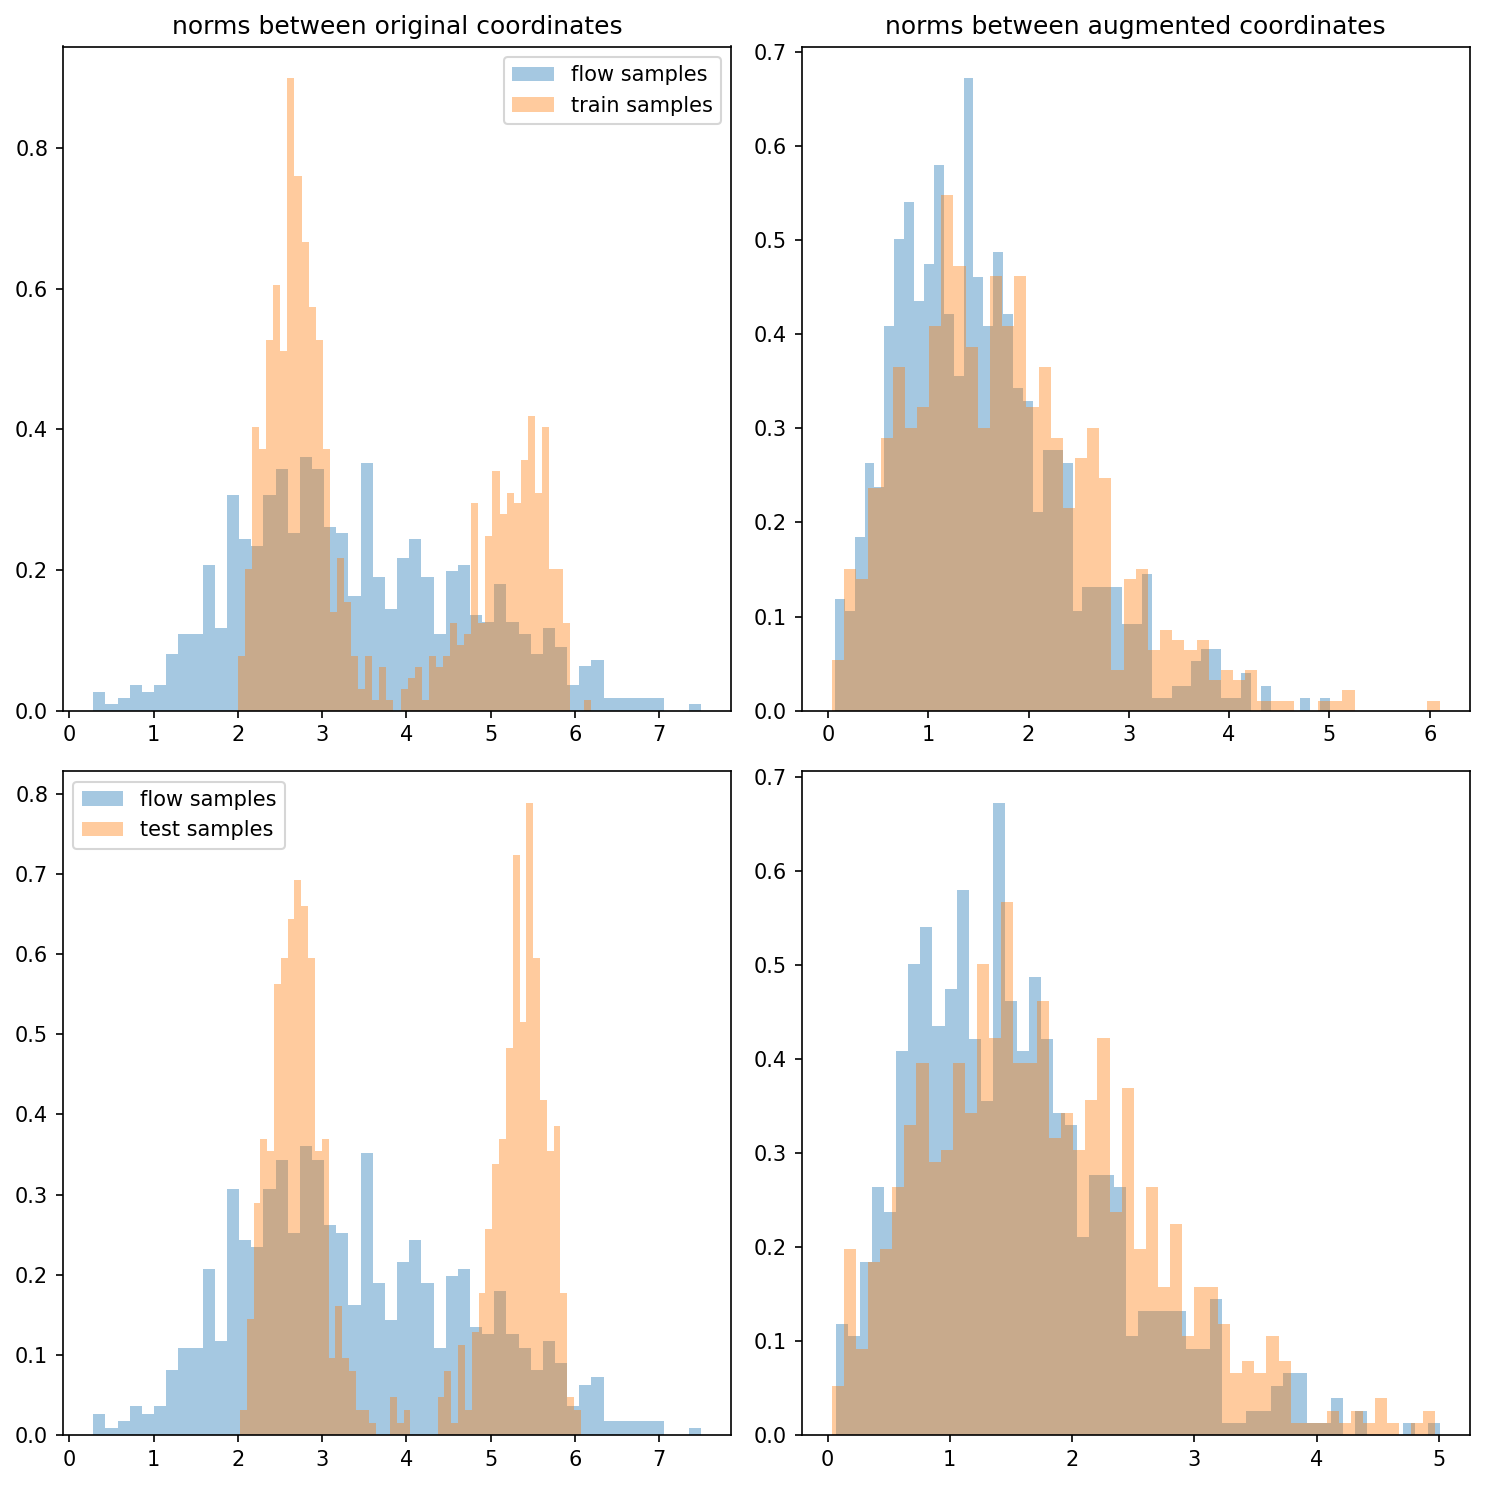

 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                       | 133/200 [02:25<00:42,  1.57it/s]

{'eval_log_lik': Array(-23.139761, dtype=float32), 'eval_marginal_log_lik': Array(-12.872764, dtype=float32)}


 78%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 155/200 [02:39<00:28,  1.59it/s]

{'eval_log_lik': Array(-23.883734, dtype=float32), 'eval_marginal_log_lik': Array(-13.5130415, dtype=float32)}


 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 159/200 [02:41<00:25,  1.64it/s]

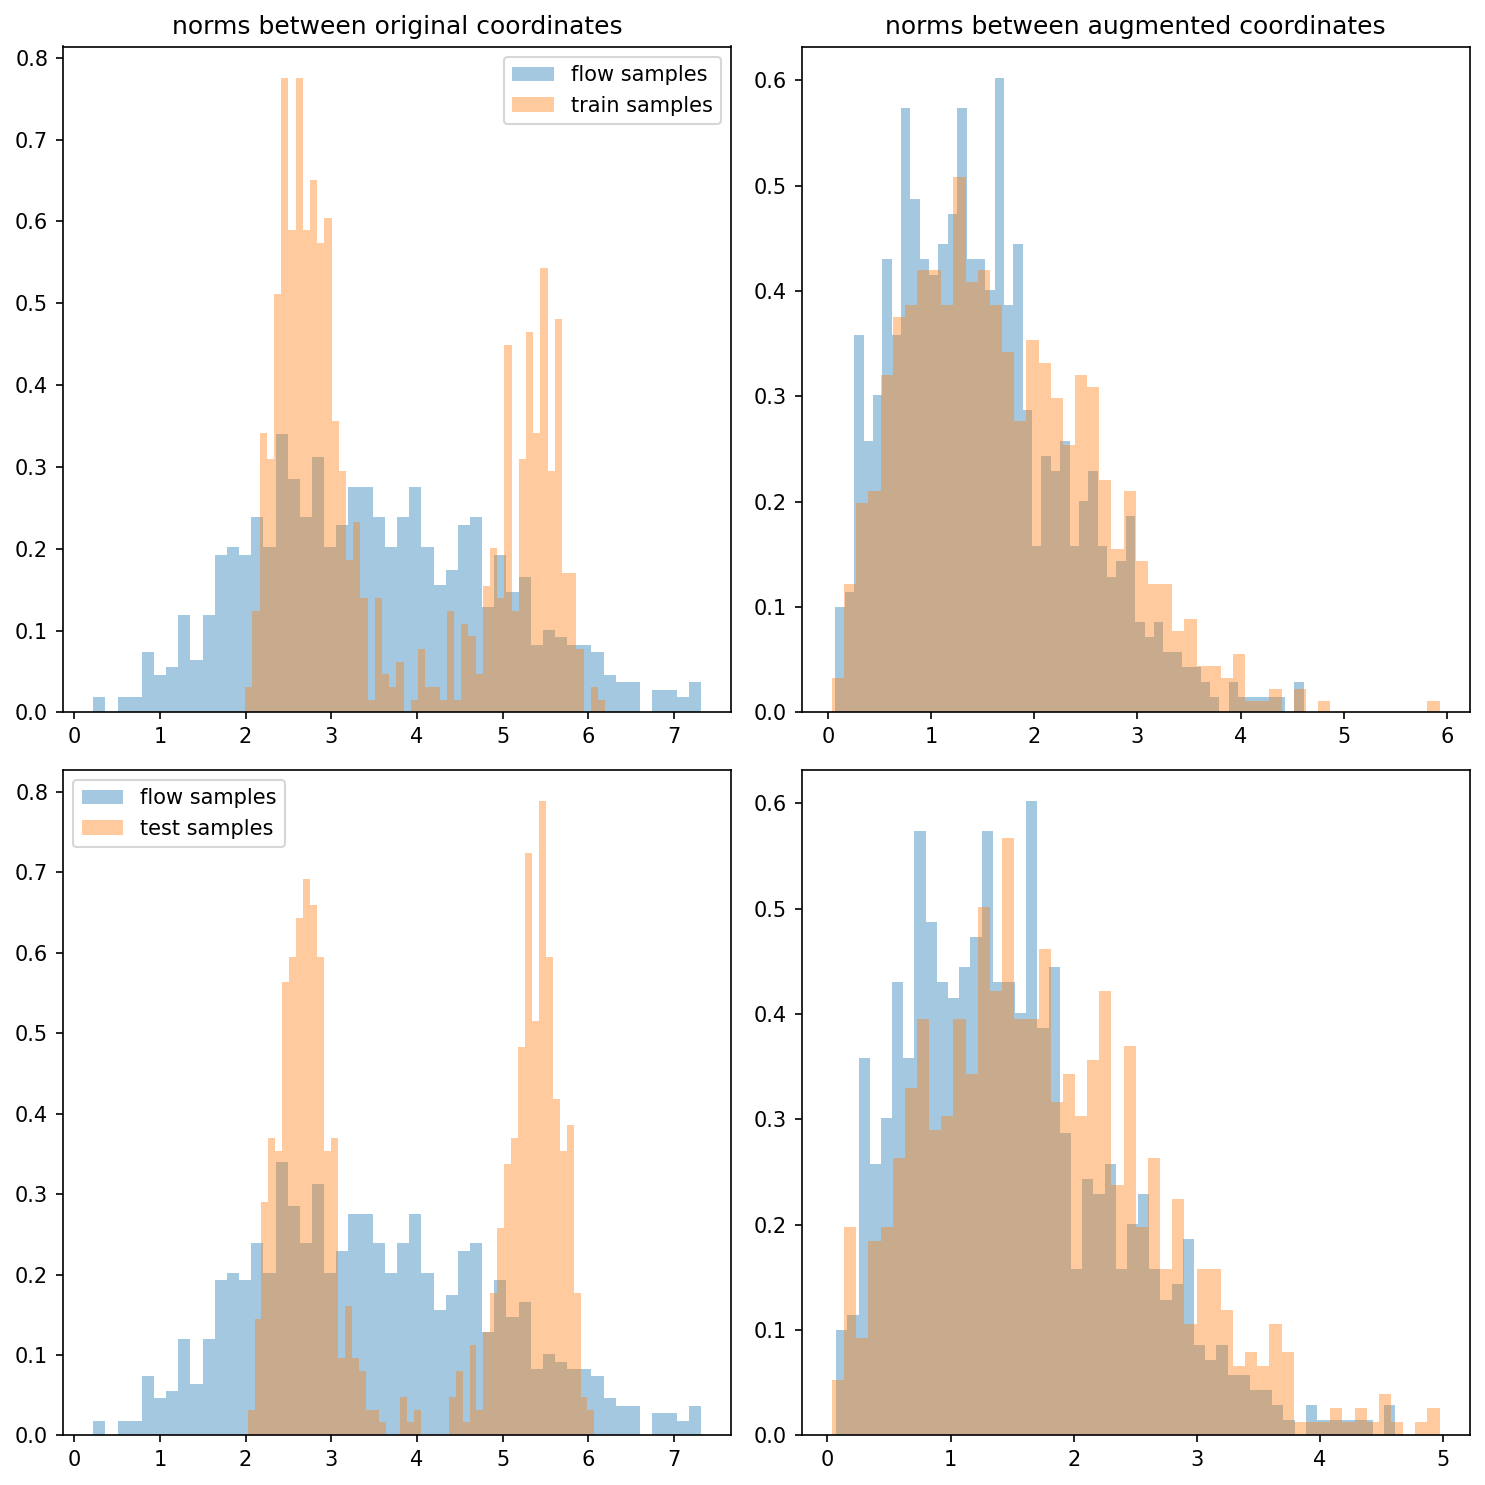

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 177/200 [02:55<00:14,  1.59it/s]

{'eval_log_lik': Array(-23.727037, dtype=float32), 'eval_marginal_log_lik': Array(-13.414957, dtype=float32)}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 199/200 [03:08<00:00,  1.63it/s]

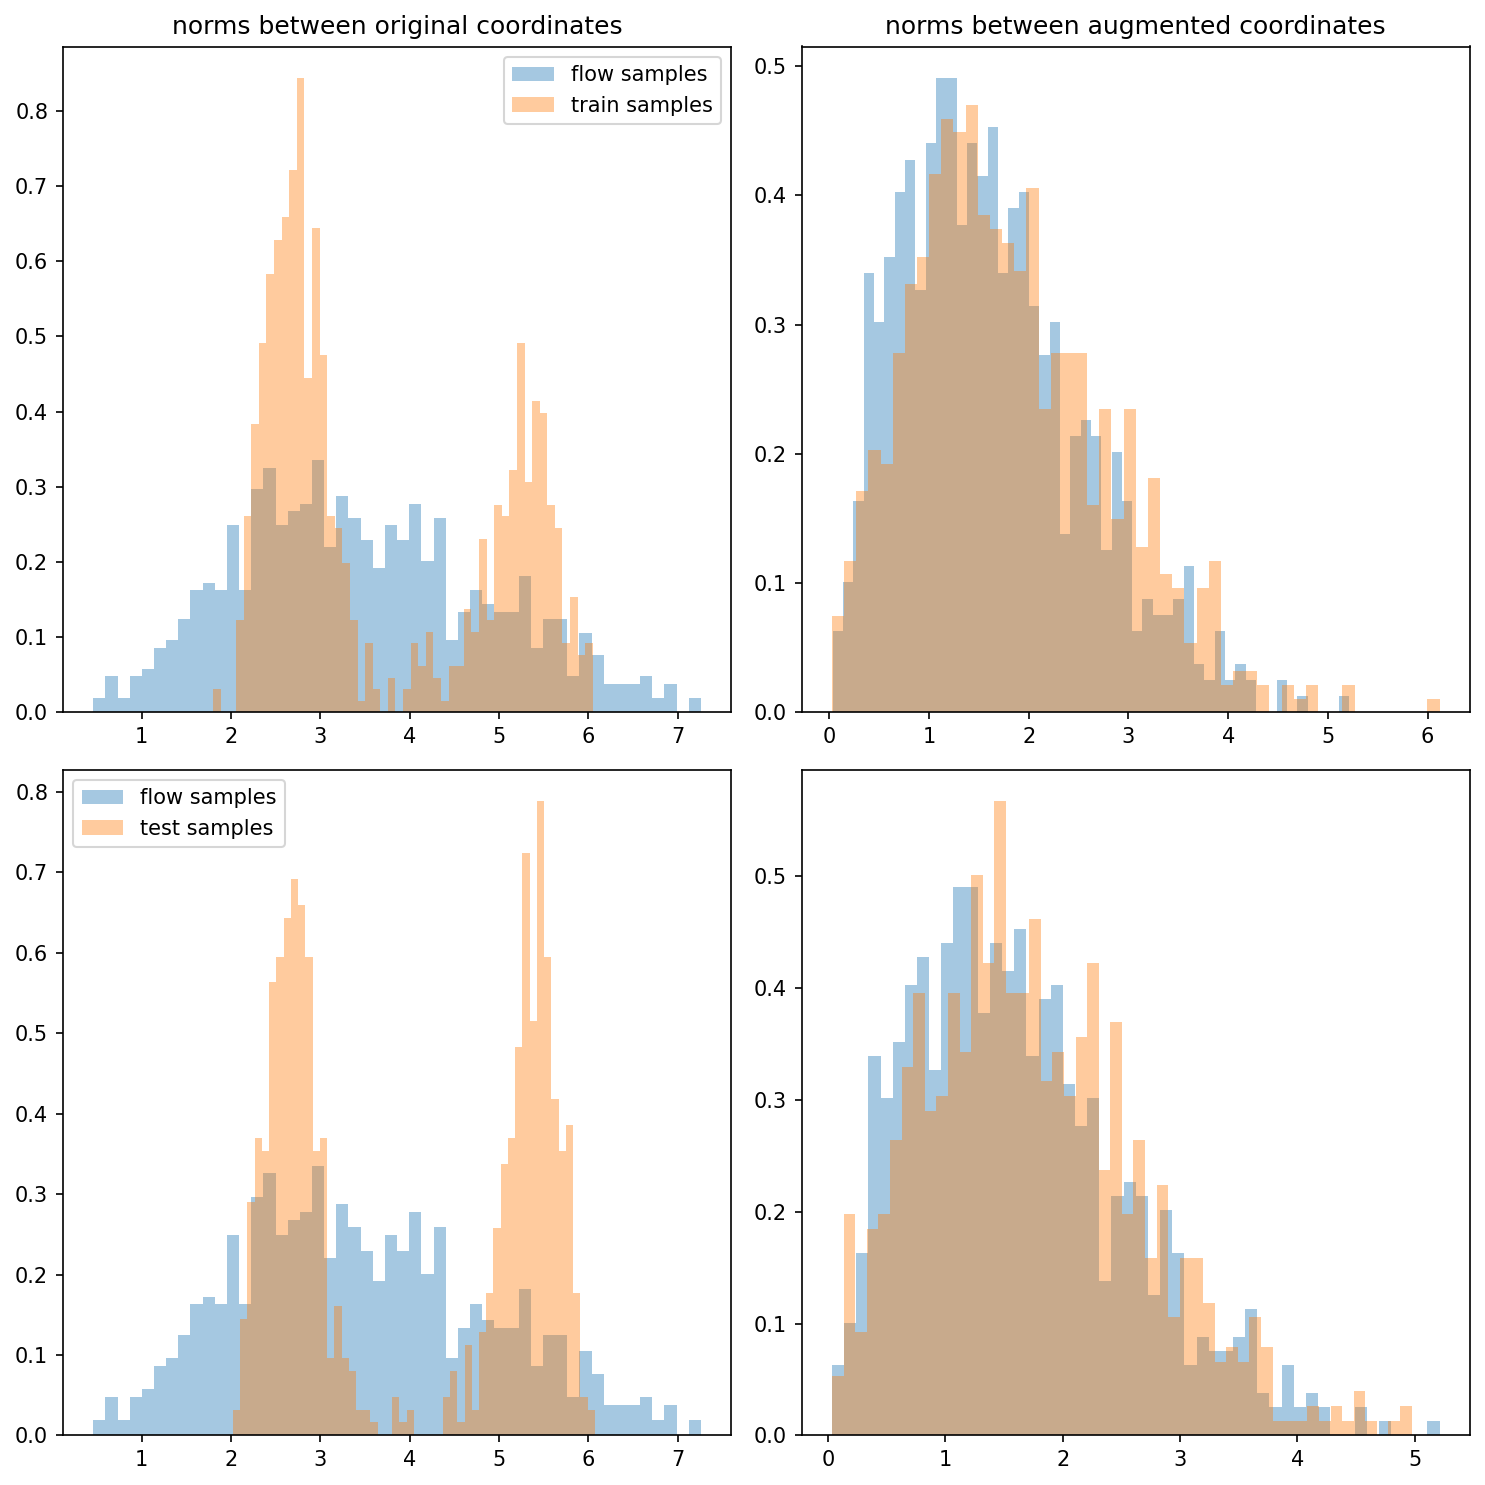

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:11<00:00,  1.04it/s]


{'eval_log_lik': Array(-23.547815, dtype=float32), 'eval_marginal_log_lik': Array(-13.15298, dtype=float32)}


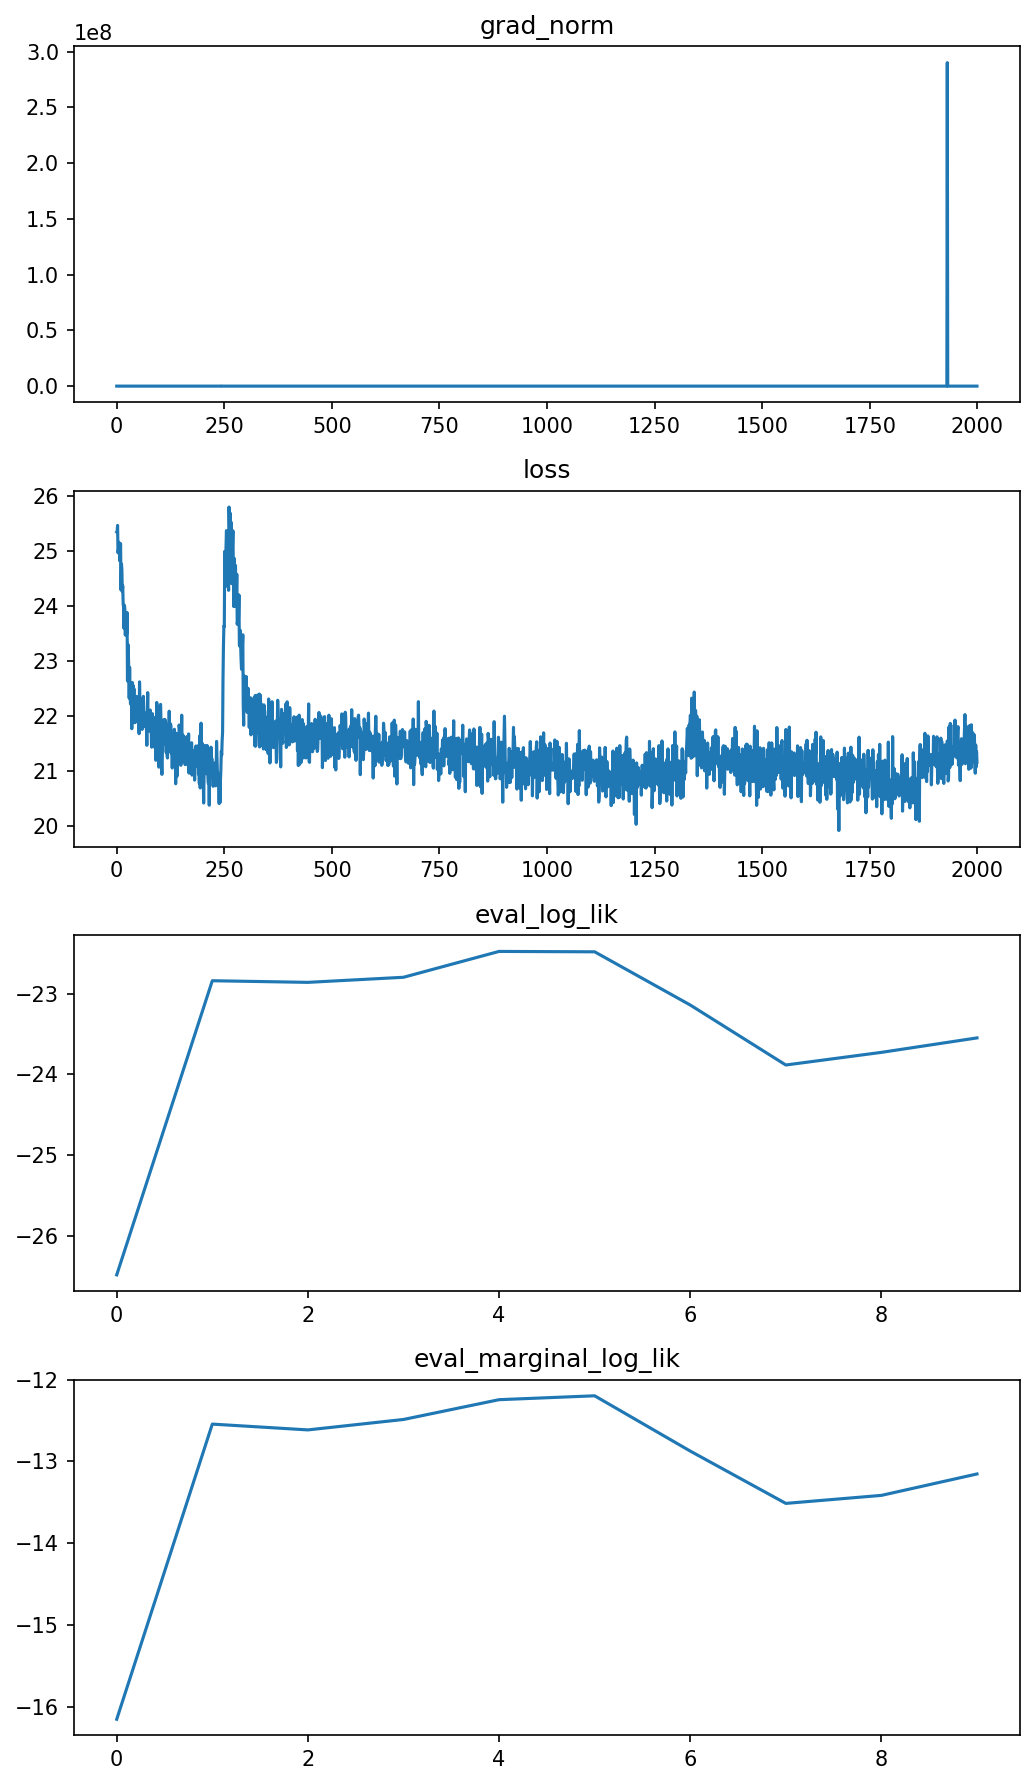

In [7]:
experiment_config = create_train_config(cfg, dim=2, n_nodes=4,
                                        load_dataset=load_dataset)

logger, params, log_prob_fn, sample_and_log_prob_fn = train(experiment_config)



In [8]:
train_data, test_data = load_dataset(batch_size=batch_size, train_set_size=1028, test_set_size=128)
x = sample_and_log_prob_fn.apply(params, jax.random.PRNGKey(1), (512,))[0]

NameError: name 'batch_size' is not defined

In [ ]:
fig, axs = plt.subplots()
plot_sample_hist(test_data, axs, dim=(0, 1), label='test samples')
plot_sample_hist(train_data, axs, dim=(0, 1), label='train samples')
plot_sample_hist(x, axs, dim=(0, 1), label='flow samples')
axs.set_title("sample histogram")
axs.legend()

In [ ]:
eval_fn(params=params, x=test_data, flow_log_prob_fn=log_prob_fn,
                                flow_sample_and_log_prob_fn=sample_and_log_prob_fn,
                                target_log_prob=dw.log_prob_fn,
                                key=jax.random.PRNGKey(1), batch_size=max(16, batch_size),
                                K=50)